In [ ]:
import requests

In [ ]:
api_key= 'c62690a9cb76412088a2427a2394b72f'

In [ ]:
#ticker = 'INFY'
#interval = '1day'

api_url = 'https://api.twelvedata.com/time_series?symbol=INFY:BSE&interval=1day&outputsize=200&apikey=demo'

data = requests.get(api_url).json()

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 

In [ ]:
data1= pd.DataFrame(data['values'])
data1

,datetime,open,high,low,close,volume
0,2021-10-13,1693.55005,1713.50000,1681.25000,1708.75000,130116
1,2021-10-12,1684.00000,1689.00000,1662.00000,1684.80005,313692
2,2021-10-11,1678.15002,1730.30005,1663.94995,1692.00000,240721
3,2021-10-08,1704.00000,1731.00000,1698.19995,1723.55005,343733
4,2021-10-07,1685.00000,1703.80005,1677.00000,1691.30005,289790
...,...,...,...,...,...,...
195,2020-12-30,1252.90002,1253.90002,1238.55005,1246.19995,139790
196,2020-12-29,1237.00000,1254.50000,1236.55005,1250.15002,241078
197,2020-12-28,1237.34998,1248.00000,1236.15002,1240.09998,252593
198,2020-12-24,1265.00000,1265.00000,1226.09998,1236.34998,503008


In [ ]:
data1["datetime"] = data1['datetime'].str.replace('-', '').astype(float)
data1=data1.astype(float)

In [ ]:
data1.shape

(200, 6)

In [ ]:
data1.head()

,datetime,open,high,low,close,volume
0,20211013.0,1693.55005,1713.50000,1681.25000,1708.75000,130116.0
1,20211012.0,1684.00000,1689.00000,1662.00000,1684.80005,313692.0
2,20211011.0,1678.15002,1730.30005,1663.94995,1692.00000,240721.0
3,20211008.0,1704.00000,1731.00000,1698.19995,1723.55005,343733.0
4,20211007.0,1685.00000,1703.80005,1677.00000,1691.30005,289790.0


In [ ]:
data1.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  200 non-null    float64
 1   open      200 non-null    float64
 2   high      200 non-null    float64
 3   low       200 non-null    float64
 4   close     200 non-null    float64
 5   volume    200 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB
None


In [ ]:
data1.describe()

,datetime,open,high,low,close,volume
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,2.021026e+07,1466.010247,1479.764499,1451.827752,1465.846497,4.668771e+05
std,1.615762e+03,162.291973,163.194896,162.723185,163.434769,5.961372e+05
min,2.020122e+07,1237.000000,1248.000000,1226.099980,1236.349980,5.555100e+04
25%,2.021030e+07,1336.000000,1348.650025,1319.524962,1336.287538,1.576532e+05
50%,2.021052e+07,1392.275025,1402.900025,1379.375000,1391.625000,2.667030e+05
75%,2.021080e+07,1625.250000,1640.850003,1624.100005,1635.799990,4.642162e+05
max,2.021101e+07,1770.849980,1787.500000,1752.199950,1763.449950,4.505456e+06


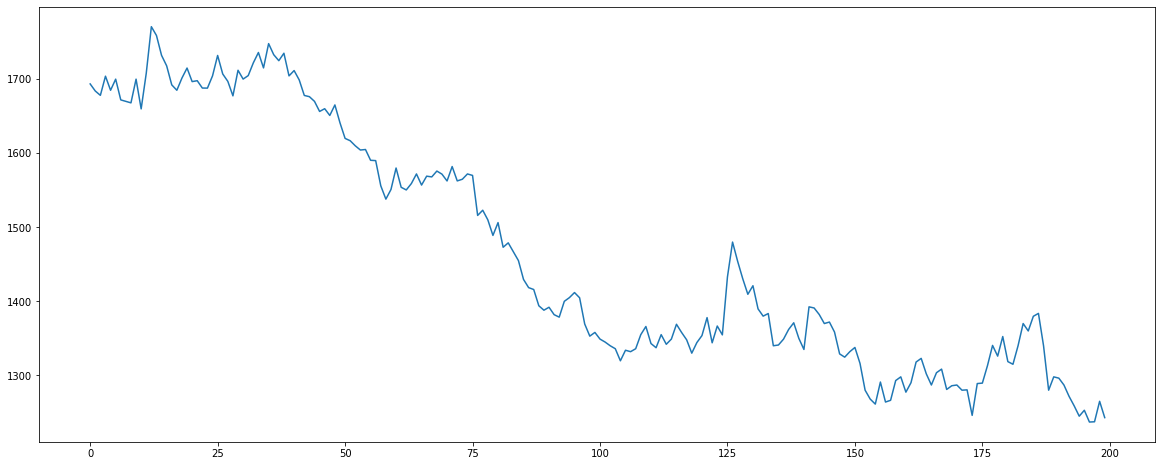

In [ ]:
data1['open'].plot(figsize=(20,8))

In [ ]:

x = data1[['open', 'high', 'low', 'volume']]
y = data1['close']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state = 100)

In [ ]:
x_train.shape

(160, 4)

In [ ]:
x_test.shape

(40, 4)

In [ ]:
y.head()

0    1708.75000
1    1684.80005
2    1692.00000
3    1723.55005
4    1691.30005
Name: close, dtype: float64

In [ ]:
x.head()

,open,high,low,volume
0,1693.55005,1713.50000,1681.25000,130116.0
1,1684.00000,1689.00000,1662.00000,313692.0
2,1678.15002,1730.30005,1663.94995,240721.0
3,1704.00000,1731.00000,1698.19995,343733.0
4,1685.00000,1703.80005,1677.00000,289790.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
LR = LinearRegression()

In [ ]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(LR.coef_)

[-4.46030045e-01  7.62789883e-01  6.84332339e-01  2.00752352e-06]


In [ ]:
print(LR.intercept_)

-3.31518806886902


In [ ]:
predicted = LR.predict(x_test)
print(predicted)

[1435.5887663  1330.07375931 1352.74904281 1379.59398874 1334.28257352
 1317.81891115 1348.07554331 1404.86579942 1613.10093304 1574.69111252
 1316.88529255 1341.09938729 1316.13273556 1258.70737516 1395.32097892
 1248.56071222 1249.32942912 1328.21546408 1314.69848295 1704.44455124
 1685.92459941 1566.44490285 1729.20390114 1710.41459619 1386.87272909
 1444.60937649 1372.01770696 1478.07724137 1358.72751394 1357.40694678
 1474.66288978 1561.73334661 1333.105866   1296.23883347 1281.50434411
 1509.34194056 1714.03617494 1265.23541644 1249.82045111 1445.79338053]


In [ ]:
predicted.shape

(40,)

In [ ]:
dfr=pd.DataFrame(y_test,predicted)

In [ ]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [ ]:
print(dfr)

     Actual Price  Predicted Price
126    1425.80005      1435.588766
104    1329.15002      1330.073759
99     1348.15002      1352.749043
92     1379.75000      1379.593989
111    1341.59998      1334.282574
167    1305.00000      1317.818911
116    1355.84998      1348.075543
96     1404.65002      1404.865799
52     1616.84998      1613.100933
69     1579.09998      1574.691113
164    1309.59998      1316.885293
124    1361.50000      1341.099387
182    1311.65002      1316.132736
154    1252.34998      1258.707375
125    1398.59998      1395.320979
196    1250.15002      1248.560712
194    1255.84998      1249.329429
177    1322.59998      1328.215464
163    1309.69995      1314.698483
31     1697.84998      1704.444551
11     1686.90002      1685.924599
73     1562.59998      1566.444903
15     1716.65002      1729.203901
41     1712.50000      1710.414596
97     1397.34998      1386.872729
128    1439.80005      1444.609376
133    1367.75000      1372.017707
82     1480.30005   

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
LR.score(x_test,y_test)

0.9975722702453794

In [ ]:
import math

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 5.624978833386007


In [ ]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 48.9654082635124


In [ ]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 6.997528725451036


In [ ]:
graph=dfr.head(20)

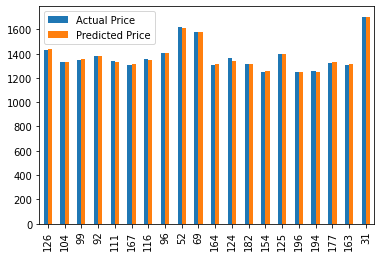

In [ ]:
graph.plot(kind='bar')